## Explorative Data  Analysis of metadata
**Data Source**: kaggle.com: https://www.kaggle.com/c/severstal-steel-defect-detection/overview <br>
**Company**: Severstal: https://en.wikipedia.org/wiki/Severstal; https://www.severstal.com/eng/about/

**Data Description**: <br>
Images of dimension 3 x 1600 x 256, with informations about the presence of the defect, its type (*multiple chips on the surface/Single vertical cracks/Multiple vertical cracks/Multiple large surface patches*) and the location of it. <br>

**EDA Results**: <br>
The analysis showed a total of 12568 images, 5902 images (46.96%) had no defect, 6239 images (49.64%) had only one defect and the remaining 427 images (3.40%) had more than one defects. <br>
The 5 classes (no defects + four defect type classes) are very unbalanced (look figure), in fact of the 12997 samples, the 85% percent has target *No Defect* or *Type 3*. The lowest represented class is *Type 2* with only 247 images (1.9%). <br>
A further inspection of the images with more defects showed that only 2 images has 3 defects, the other 425 had 2 defects (284 with co-occurance of defects type 3 and type 4).

### 1. Requirments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Parameters 

In [2]:
METADATA_PATH = '../data/data.csv'
LABEL_MULTI = ['No Defect', 'Type 1', 'Type 2', 'Type 3', 'Type 4']   

### 3. Analysis
### Metadata dataframe

In [3]:
df = pd.read_csv(METADATA_PATH)

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].unique().shape[0]
imgs_with_one_defect = df.ImageId.value_counts()[df.ImageId.value_counts() == 1].shape[0] - imgs_with_no_defect
imgs_with_more_defects = df.ImageId.value_counts()[df.ImageId.value_counts() > 1].shape[0]
n_defects_img_with_more_defects = total_examples - imgs_with_no_defect - imgs_with_one_defect

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))

print('\tNumber of images with more than one defect type:\t{}  ({:.2f}%) accounting for {} defects'
      .format(imgs_with_more_defects, imgs_with_more_defects*100/unique_img, n_defects_img_with_more_defects))
df.head()

INFO:
	DefectID:						[0, 1, 2, 3, 4]
	Number of examples:					12997
	Number of unique images:				12568

	Number of images with no defect:			5902 (46.96%)
	Number of images with one defect:			6239 (49.64%)
	Number of images with more than one defect type:	427  (3.40%) accounting for 856 defects


,ImageId,ClassId,EncodedPixels,Folder
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,0
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,0
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,0
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,0


### Target Distribution

In [4]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Type 1', 2:'Type 2', 3:'Type 3', 4:'Type 4'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
Class Distribution:		[5902, 897, 247, 5150, 801]
Class Relative Distribution:	[0.454, 0.069, 0.019, 0.396, 0.062]


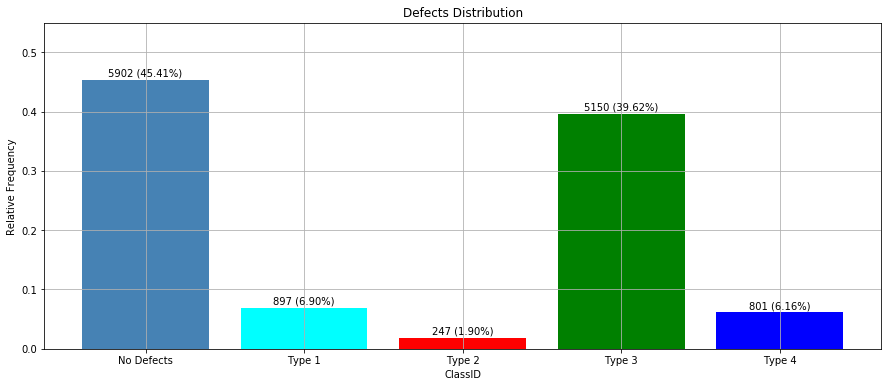

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax.set_title('Defects Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.55])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.2f}%)'.format(class_dist.values[i], height*100)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

In [6]:
class_defect_dist = df.ClassId.value_counts().sort_index()[1:]
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
Class Distribution:		[5902, 897, 247, 5150, 801]
Class Relative Distribution:	[0.454, 0.069, 0.019, 0.396, 0.062]


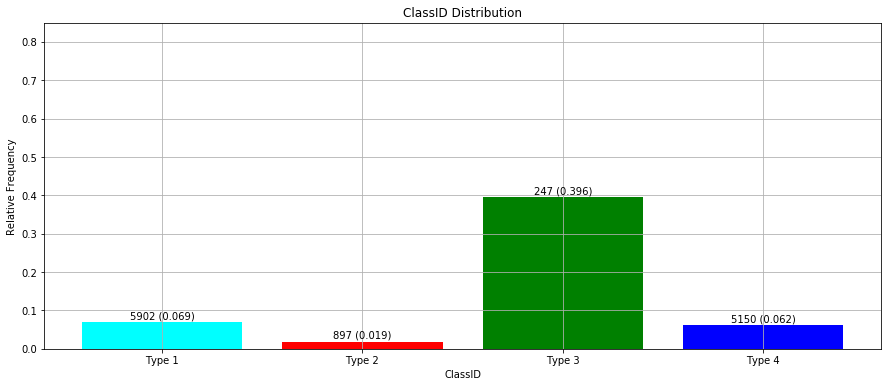

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(list(ClassId2ClassName.values())[1:], class_defect_dist/class_dist.sum(),
         color=['cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.85])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Non uniqueness data analysis

In [8]:
non_unique_image_id = df.ImageId.value_counts()[df.ImageId.value_counts() > 1].index
non_unique_image_df = non_df = df[df.ImageId.isin(non_unique_image_id)]
non_unique_image_df.head()

,ImageId,ClassId,EncodedPixels,Folder
5,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,0
6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...,0
8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...,0
9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...,0
18,008ef3d74.jpg,1,356336 4 356587 11 356838 18 357089 25 357340 ...,0


In [9]:
non_class_dist = non_df.ClassId.value_counts().sort_index()
relative_fr = [round(i, 3) for i in non_class_dist.values/non_class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('ClassID in non unique defects:\t{}'.format(sorted(non_df.ClassId.unique())))
print('Class Distribution:\t\t{}'.format(list(non_class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
ClassID in non unique defects:	[1, 2, 3, 4]
Class Distribution:		[128, 52, 391, 285]
Class Relative Distribution:	[0.15, 0.061, 0.457, 0.333]


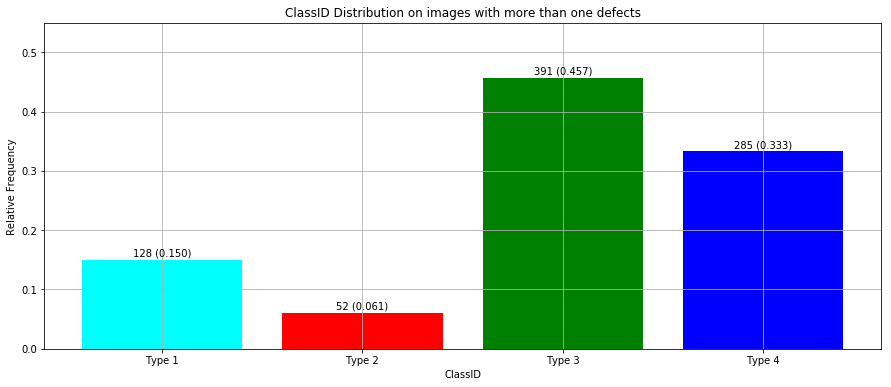

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(list(ClassId2ClassName.values())[1:], non_class_dist/non_class_dist.sum(),
         color=['cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution on images with more than one defects')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.55])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(non_class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

In [11]:
combo_defects = []
for img in non_unique_image_id:
    img_df = non_df[df.ImageId == img]
    combo_defects.append(tuple([img, str(['{}'.format(i) for i in img_df.ClassId])]))
grouped_non_df = gn_df = pd.DataFrame(combo_defects, columns = ['ImageId', 'ClassIds'])
gn_df.head()

C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,ImageId,ClassIds
0,db4867ee8.jpg,"['1', '2', '3']"
1,ef24da2ba.jpg,"['1', '2', '3']"
2,2c37ea89f.jpg,"['1', '3']"
3,7c764812d.jpg,"['1', '3']"
4,c62ca3c1f.jpg,"['1', '3']"


In [12]:
combo_types = gn_df.ClassIds.unique()
combo_types_dict = {}
for combo in combo_types:
    combo_types_dict[combo] = gn_df[gn_df.ClassIds == combo].shape[0]
print('Type of co-occurance cases and their frequencies:\n{}'.format(combo_types_dict))

Type of co-occurance cases and their frequencies:
{"['1', '2', '3']": 2, "['1', '3']": 91, "['3', '4']": 284, "['2', '3']": 14, "['1', '2']": 35, "['2', '4']": 1}


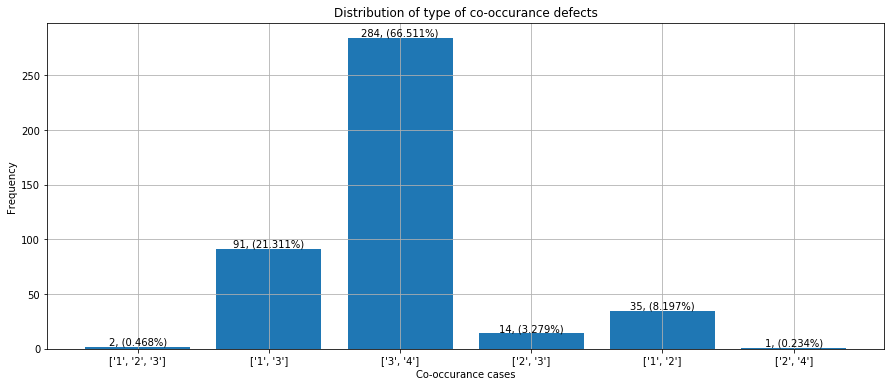

In [13]:
fig = plt.figure(figsize=(15, 6))
bar1 = plt.bar(combo_types_dict.keys(), combo_types_dict.values())
plt.grid()
plt.title('Distribution of type of co-occurance defects')
plt.xlabel('Co-occurance cases')
plt.ylabel('Frequency')

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{}, ({:.3f}%)'.format(height, 100*height/sum(combo_types_dict.values()))
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Uniqueness data analysis

In [14]:
unique_image_id = df.ImageId.value_counts()[df.ImageId.value_counts() == 1].index
unique_image_df = unique_df = df[df.ImageId.isin(unique_image_id)]
unique_image_df.head()

,ImageId,ClassId,EncodedPixels,Folder
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,0
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,0
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,0
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,0


In [15]:
unique_class_dist = unique_df.ClassId.value_counts().sort_index()
relative_fr = [round(i, 3) for i in unique_class_dist.values/unique_class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('ClassID in non unique defects:\t{}'.format(sorted(unique_df.ClassId.unique())))
print('Class Distribution:\t\t{}'.format(list(unique_class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
ClassID in non unique defects:	[0, 1, 2, 3, 4]
Class Distribution:		[5902, 769, 195, 4759, 516]
Class Relative Distribution:	[0.486, 0.063, 0.016, 0.392, 0.043]


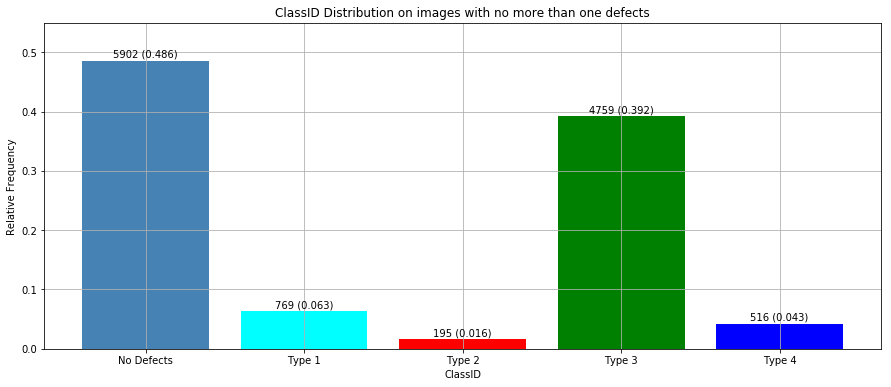

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(list(ClassId2ClassName.values()), unique_class_dist/unique_class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution on images with no more than one defects')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.55])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(unique_class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Comparison

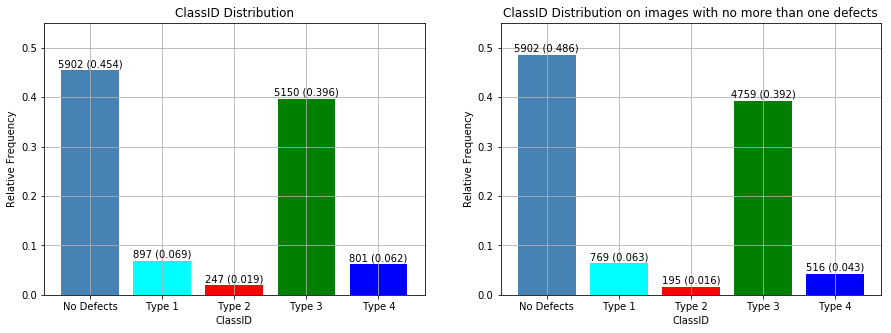

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
bar1 = ax[0].bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
                 color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax[0].set_title('ClassID Distribution')
ax[0].set_ylabel('Relative Frequency')
ax[0].set_xlabel('ClassID')
ax[0].grid()
ax[0].set_ylim([0, 0.55])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    ax[0].text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')

bar2 = ax[1].bar(list(ClassId2ClassName.values()), unique_class_dist/unique_class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax[1].set_title('ClassID Distribution on images with no more than one defects')
ax[1].set_ylabel('Relative Frequency')
ax[1].set_xlabel('ClassID')
ax[1].grid()
ax[1].set_ylim([0, 0.55])

for i, rect in enumerate(bar2):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(unique_class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()